# to estimate the factors corresponding to Attrition rate of employees.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split #sklearn's randomised data splitting function

In [2]:
df = pd.read_csv("Attrition Data.csv")

In [3]:
df.shape

(1470, 25)

In [4]:
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,Yes,11,3,1,8,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,10,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Yes,15,3,2,7,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Yes,11,3,3,8,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,No,12,3,4,6,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobRole                   1470 non-null   object
 11  JobSatisfaction           1470 non-null   int64 
 12  MaritalStatus             1470 non-null   object
 13  MonthlyIncome             1470 non-null   int64 
 14  NumCompaniesWorked      

In [6]:
corr = df.corr()
corr                      #no corr is greater than 0.8

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,-0.004892,0.497855,0.299635,0.003634,0.001904,0.053535,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.006557,0.004628,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,-0.011296,0.094961,0.126317,-0.011111,-0.024539,-0.009118,0.148280,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,0.007665,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,0.034297,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,1.000000,-0.007157,-0.055699,0.020002,0.002297,-0.012454,-0.020185,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,-0.007157,1.000000,0.149515,-0.027269,-0.017120,0.025873,0.772893,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,-0.055699,0.149515,1.000000,-0.010238,-0.014095,0.052733,0.237639,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.040235,-0.011111,-0.031701,-0.017205,0.020002,-0.027269,-0.010238,1.000000,0.773550,-0.040490,-0.020608,-0.003280,-0.035991,-0.001520,-0.022154,-0.011985
PerformanceRating,0.001904,0.027110,-0.024539,-0.029548,-0.029071,0.002297,-0.017120,-0.014095,0.773550,1.000000,-0.031351,0.006744,0.002572,0.003435,0.034986,0.017896,0.022827


<AxesSubplot:>

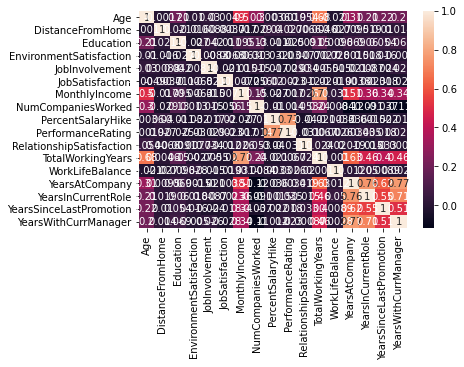

In [7]:
sns.heatmap(corr,annot=True)

In [12]:
df.drop(["Department","EducationField"],axis=1)
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,Yes,11,3,1,8,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,10,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Yes,15,3,2,7,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Yes,11,3,3,8,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,No,12,3,4,6,3,2,2,2,2
